import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


Loading Dataset

In [12]:
df=pd.read_csv('diabetes.csv')
print("Shape",df.shape)
df.head()

Shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Measuring the statistical values of the dataset-range of each column

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#proportion of non diabetic cases is more-500

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
#seperating the data and labels
X = df.drop(columns ='Outcome',axis=1)
Y= df['Outcome']

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


graphs


In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'correlation matrix of squared correlations \n\n\n\n\n')

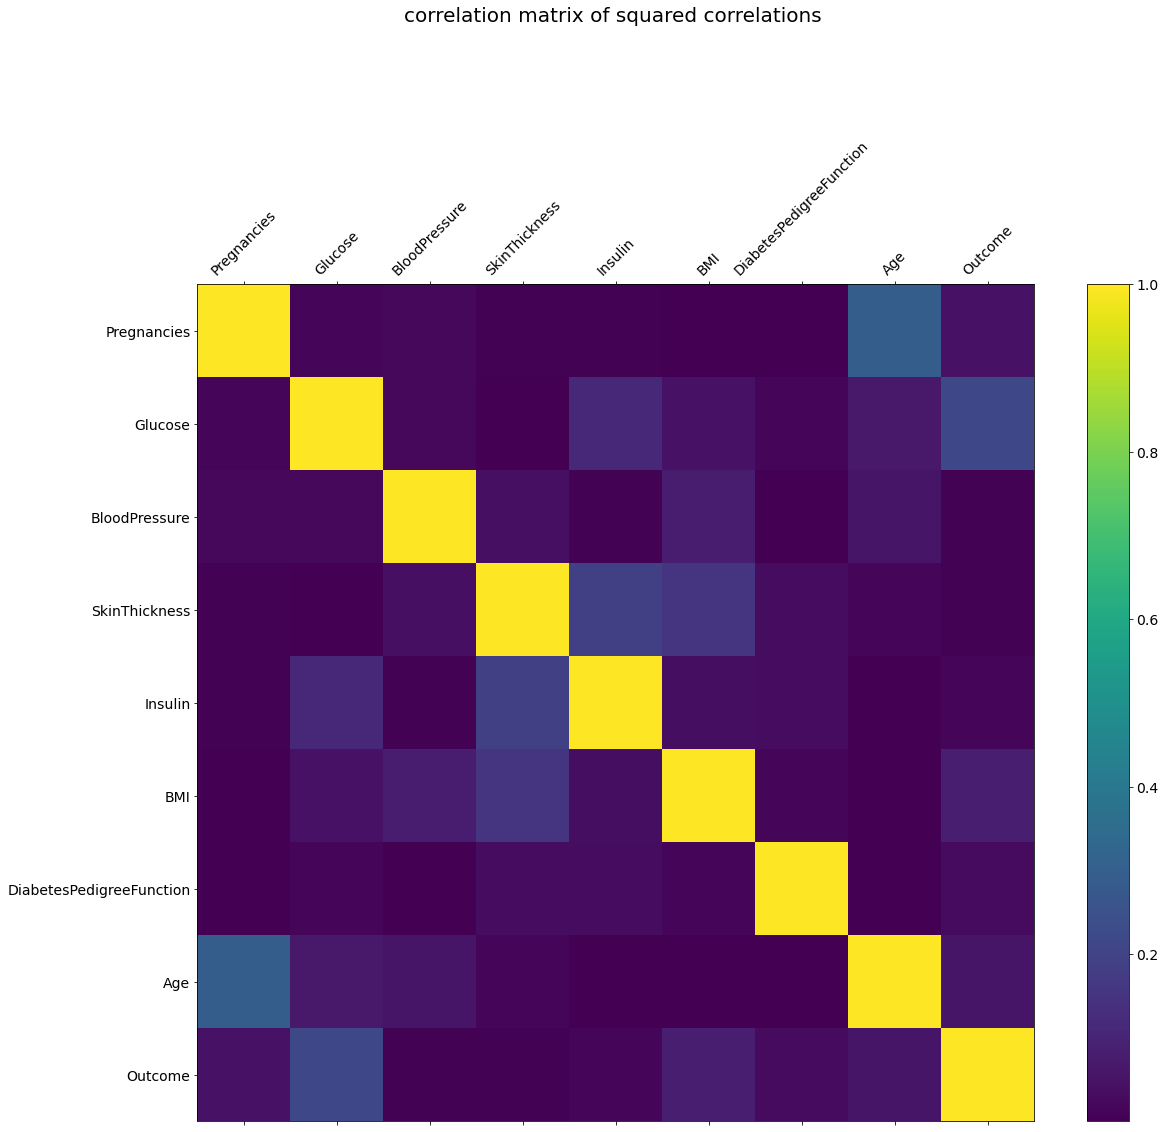

In [21]:
fig = plt.figure(figsize = (19,15))
plt.matshow(df.corr()**2,fignum = fig.number)
plt.xticks(range(df.shape[1]),df.columns,fontsize = 14, rotation = 45)
plt.yticks(range(df.shape[1]),df.columns,fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title("correlation matrix of squared correlations \n\n\n\n\n",fontsize =20)

check which columns are useful and which are not

In [24]:
#1-->diabetic
#0-->healthy

print(df["Outcome"].value_counts())
fig = plt.figure(figsize = (10, 6))

0    500
1    268
Name: Outcome, dtype: int64


<Figure size 720x432 with 0 Axes>

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose')

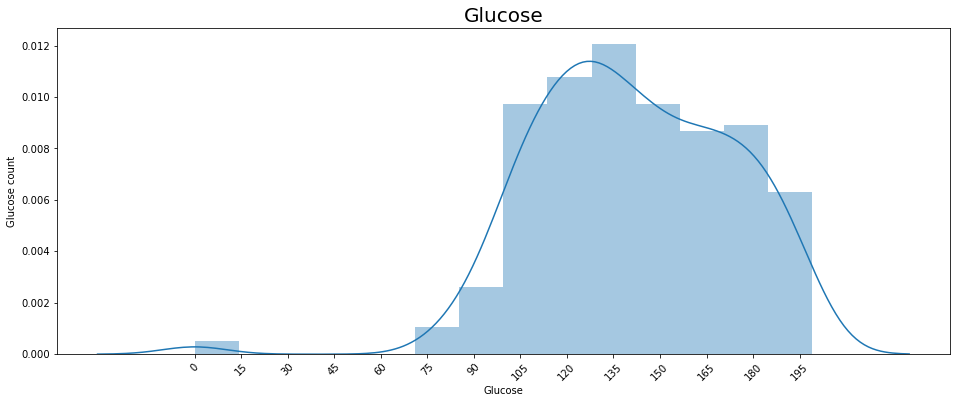

In [23]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(df["Glucose"][df["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin')

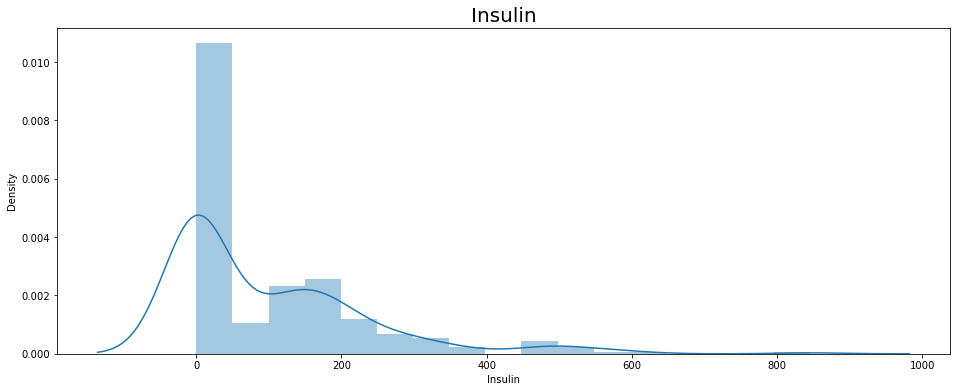

In [45]:
#insulin for diabetic 

fig = plt.figure(figsize = (16,6))

sns.distplot(df["Insulin"][df["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)


C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

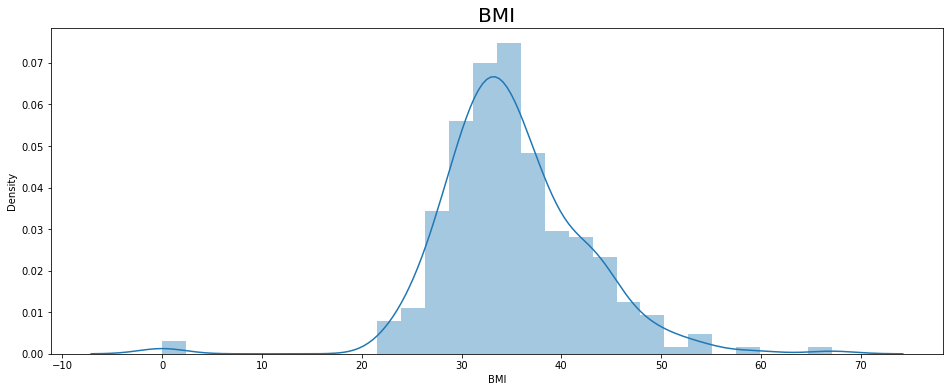

In [46]:
#BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(df["BMI"][df["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)




C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'diabetespedigreefunction')

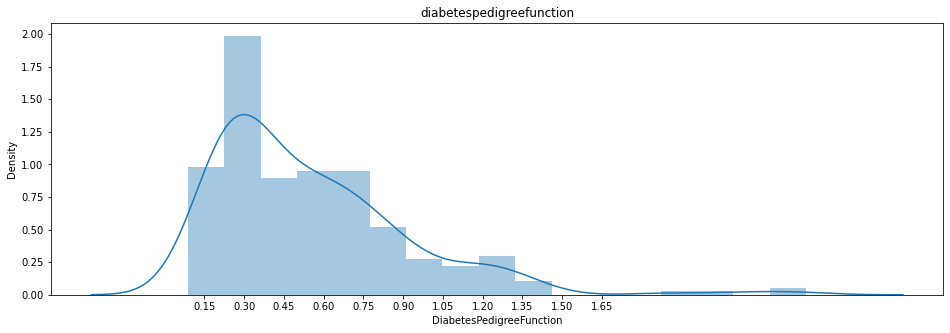

In [47]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (16,5))
sns.distplot(df["DiabetesPedigreeFunction"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

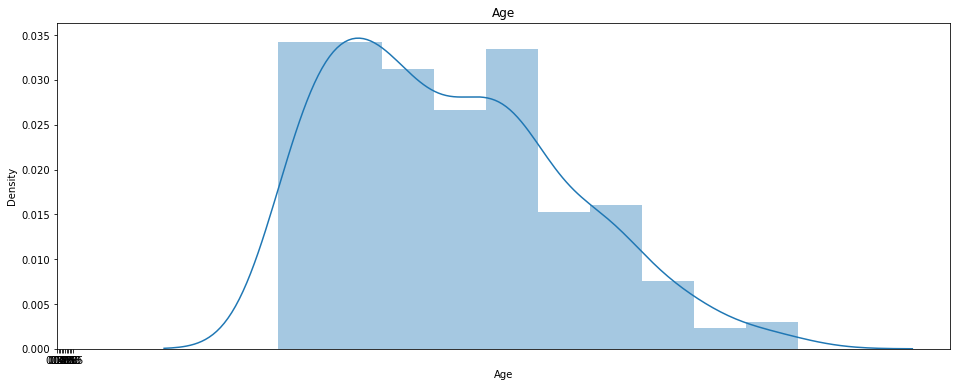

In [48]:
#Age for diabetic
fig = plt.figure(figsize = (16,6))

sns.distplot(df["Age"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

Data pre-processing using standard scalar

In [49]:
#seperating dependent and independent columns
X = df.drop(["Pregnancies","BloodPressure","SkinThickness"],axis = 1)
y = df.iloc[:,-1]


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

print("X_train size:", X_train.shape)
print("y_train size: ",y_train.shape,"\n")
print("X_test size:", X_test.shape)
print("y_test size:",y_test.shape)


X_train size: (614, 6)
y_train size:  (614,) 

X_test size: (154, 6)
y_test size: (154,)


In [51]:
#standard scaling

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [64]:
print(sc)

StandardScaler()


In [65]:
print(X_train)

[[ 0.91569367  0.3736349   0.37852648  0.67740401  1.69955804  1.33352186]
 [-0.75182191 -0.69965674 -0.50667229 -0.07049698 -0.96569189 -0.74989397]
 [ 1.38763205  5.09271083  2.54094063 -0.11855487 -0.88240283 -0.74989397]
 ...
 [-0.84620959 -0.69965674 -0.94927168 -0.95656442 -1.04898095 -0.74989397]
 [-1.12937261 -0.69965674 -0.26640405 -0.50001442  0.11706589 -0.74989397]
 [ 0.47521786 -0.69965674 -4.07275877  0.52121586  2.94889395 -0.74989397]]


In [66]:
print(X_test)

[[ 2.39507259e+00 -6.69261578e-01  1.52657475e+00  2.78935129e+00
  -9.30642826e-01  1.50883920e+00]
 [-4.25892449e-01  2.80308009e-01  3.19441160e-01 -2.76988247e-01
  -8.35980346e-01 -6.62761146e-01]
 [-1.37643502e+00 -6.69261578e-01  3.71360884e-01 -3.17253311e-01
  -6.46655385e-01 -6.62761146e-01]
 [ 1.38320470e+00  9.92485199e-01 -6.92993461e-01  2.89819971e-01
   1.81456910e+00  1.50883920e+00]
 [-3.03241795e-01 -6.69261578e-01 -8.48752633e-01  5.15923795e-01
  -7.86805031e-02 -6.62761146e-01]
 [-1.22312170e+00 -2.89433743e-01 -5.89154013e-01 -6.51763079e-01
  -7.41317865e-01 -6.62761146e-01]
 [ 9.53927407e-01  9.54502416e-01  3.97320746e-01  1.23759765e+00
   1.10644458e-01  1.50883920e+00]
 [ 1.68983133e+00  8.12066978e-01  2.80501367e-01  2.04599625e+00
   1.90923158e+00  1.50883920e+00]
 [ 1.87360820e-01  1.94205479e+00 -4.46374771e-01  3.42739770e+00
  -6.46655385e-01 -6.62761146e-01]
 [-5.48543103e-01  1.13492064e+00  8.51618332e-01 -5.24773260e-01
   2.19321902e+00 -6.6276

ML MODELING

(1)KNN


In [52]:
kn_classifier = KNeighborsClassifier(n_neighbors =5,metric = 'minkowski',p = 2)
kn_classifier.fit(X_train,y_train)


KNeighborsClassifier()

In [53]:
kn_y_pred = kn_classifier.predict(X_test)

In [54]:
cm_kn = confusion_matrix(y_test, kn_y_pred)
print(cm_kn)

[[107   0]
 [  1  46]]


In [55]:
print("Correct:",sum(kn_y_pred == y_test))
print("Incorrect : ",sum(kn_y_pred != y_test))
print("Accuracy:",sum(kn_y_pred ==y_test)/len(kn_y_pred))

Correct: 153
Incorrect :  1
Accuracy: 0.9935064935064936


(2)SVM

In [56]:
svc_classifier = SVC(kernel ="linear",random_state = 0)
svc_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [57]:
svc_y_pred = svc_classifier.predict(X_test)

In [58]:
svc_cm = confusion_matrix(y_test,svc_y_pred)
print(svc_cm)

[[107   0]
 [  0  47]]


In [59]:
print("Correct:",sum(svc_y_pred == y_test))
print("Incorrect : ",sum(svc_y_pred != y_test))
print("Accuracy:",sum(svc_y_pred ==y_test)/len(kn_y_pred))

Correct: 154
Incorrect :  0
Accuracy: 1.0


(3)naive bias

In [60]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [61]:
nb_y_pred =nb_classifier.predict(X_test)

In [62]:
nb_cm = confusion_matrix(nb_y_pred,y_test)
print(nb_cm)

[[107   0]
 [  0  47]]


In [63]:
print("Correct:",sum(nb_y_pred == y_test))
print("Incorrect : ",sum(nb_y_pred != y_test))
print("Accuracy:",sum(nb_y_pred ==y_test)/len(nb_y_pred))

Correct: 154
Incorrect :  0
Accuracy: 1.0


Result:
the dataset consists of 768 records and 9 columns

the ml model KNN was able to classify patients as diabetic or not with an accuracy of 99.35%

the ml model SVM,NaiveBias were able to classify patients as diabetic or not with an accuracy of 100%